If you haven’t read readme.md, do it now please :)

In [14]:
import numpy as np


t0, t1 = 5, 50

np.random.seed(42)


def standardize(X):
    for i in range(X.shape[1]):
        X[:,i] = (X[:,i] - np.mean(X[:,i]))/np.std(X[:,i])


def learning_schedule(t):
    return t0 / (t + t1)


def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

The relevant equations are:<br/>
$\sigma={1 \over 1 + e^-t}$<br />
$\hat{p} = \sigma(x^T \theta)$<br/>
$\hat{y} =\left\{
\begin{array}{ll}
      0, \hat{p} < 0.5 \\
      1, \hat{p} \geq 0.5
\end{array}
\right.$<br />
Notice what's inside the sigma call in that p hat expression is just good old linear expression that's also present in linear regression notebooks. Also, the last equation above represents how logistic regression decides on what class the given sample belongs to. Now onto the cost function: <br/>
$c(a)= \left\{
\begin{array}{ll}
      -log(\hat{p}), y = 1 \\
      -log(1 - \hat{p}), y = 0 \\
\end{array}
\right.$<br />
The $c(\theta)$ function is an expression for a single sample, so we're going to transform it to a matrix form. But first - why the logarithm (btw. it's natural log - I didn't use the standard $ln$, because the literature seems to stick with the $log$ name)? From the properties of logarithms we know that they take very small values for very small arguments and grow for larger arguments. That's almost what we want - the target logic should be: take high values for small arguments and get smaller for bigger ones (approaching 1 to be exact). In order to achieve that, we put the minus sign in front of the logarithm. So to integrate all we know, read that whole expression as follows:
- When the actual class equals 1, p hat should be high and if it's not penalize it highly, because $-log$ of something small is a big number.
- When the actual class equals 0, p hat should be low and if it's not penalize it highly, because $-log$ of 1 minus something big is $-log$ of something small, so a big number again. Notice here that 1 minus a small number will give you something close to that 1. That means that the cost, because of the $-log$ part will be small.

Now we'd like to put that piecewise function into a single expression, so that we could differentiate it to find the gradient: <br/>
$J(\theta) = -{1 \over m} \sum_{i=1}^m[y^i log(\hat{p^i}) + (1-y^i)log(1-\hat{p^i})]$<br />
The cost function for the whole algorithm is called $J(\theta)$. Notice parts of the piecewise function above present in this expression and the ${1 \over m}$ part - that's there because we average the cost over all training set. But why the additional expressions? Well, you want the value of the first part in one case and the value of the second part in the other case, right? Think about it like this: moving the condition in front of the logarithm will do the job, because:
- For the 1 class the value is: $1 * log (\hat{p}) + (1 - 1) * log(1 - \hat{p}) = 1 * log (\hat{p})$
- For the 0 class the value is: $0 * log (\hat{p}) + (1 - 0) * log(1 - \hat{p}) = 1 * log(1 - \hat{p})$

So this is how the piecewise function collapses into a single expression. Move the minus side in front of it all, add the fraction to get the average, and we're off for a good start to transform it once again, this time into a matrix form. However I won't do that, since it's a [whole lot of math](https://medium.com/@andrewdaviesul/chain-rule-differentiation-log-loss-function-d79f223eae5). I have an alternative explanation: logistic regression is actually the linear regression, jammed into the sigmoid function to get the probabilities, therefore its matrix form derivative should be almost the same except for the presence of sigmoid function. Turns out the gradient formula is exactly that:<br/>
$\nabla_{\theta}J(\theta) = {1 \over m} X^T(\sigma(X \theta) - y)$

In [15]:
def logistic_regression(X, y, theta, epoch, batch_size):
    random_idx = np.random.randint(X.shape[0] - batch_size)
    xi = X[random_idx:random_idx + batch_size + 1]
    yi = y[random_idx:random_idx + batch_size + 1]
    gradient = 1/xi.shape[0] * xi.T.dot(sigmoid(xi.dot(theta)) - np.reshape(yi, (len(yi), 1)))
    eta = learning_schedule(epoch * xi.shape[0] + 1)

    return theta - eta * gradient

Here I decided to actually define the cost function in order to be able to see how the cost is dropping (or not) - the $J$ function above.<br/>

In [16]:
def cost(X, theta):
    z = X.dot(theta)
    cost0 = y.T.dot(np.log(sigmoid(z)))
    cost1 = (1 - y).T.dot(np.log(1 - sigmoid(z)))
    cost_val = -((cost1 + cost0)) / len(y)

    return cost_val

In [17]:
def predict(X, theta):
    z = X.dot(theta)
    preds = []

    for i in sigmoid(z):
        if i > 0.5:
            preds.append(1)
        else:
            preds.append(0)

    return preds

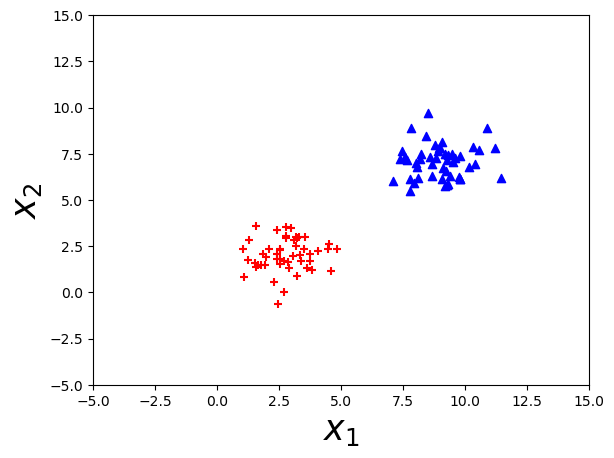

In [18]:
import matplotlib.pyplot as plt


x1 = np.random.normal(loc=3.0, size=50)
y1 = np.random.normal(loc=2.0, size=50)
x2 = np.random.normal(loc=9.0, size=50)
y2 = np.random.normal(loc=7.0, size=50)

plt.scatter(x1,y1,color='red', marker='+',s=35)
plt.scatter(x2,y2,color='blue', marker= '^',s=35)
plt.xlim(-5,15)
plt.ylim(-5,15)
plt.xlabel('$x_1$',fontsize=25)
plt.ylabel('$x_2$',fontsize=25)
plt.show()

In [19]:
theta = np.zeros((3, 1))
n_epochs = 50
X = np.vstack((np.c_[x1, y1], np.c_[x2, y2]))
y_true = np.ones((50,))
y_false = np.zeros((50,))
y = np.hstack((y_true, y_false))
X_b = np.c_[np.ones((X.shape[0], 1)), X]
costs = []

for epoch in range(n_epochs):
    for i in range(X.shape[0]):
        theta = logistic_regression(X_b, y, theta, epoch, 10)
        cost_val = cost(X_b, theta)

        costs.append(cost_val)

all_preds = predict(X_b, theta)

In [20]:
idx = 50

predict(np.array([X_b[idx, :]]), theta)

[0]

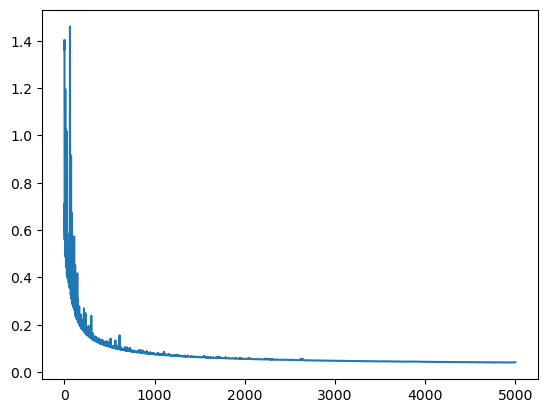

In [21]:
plt.clf()
plt.plot(list(range(len(costs))), costs)
plt.show()